In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
# Set some display options for pandas and plots
pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')

# Load the processed data
# Adjust the path if your notebook is not in the 'notebooks' directory
try:
    df = pd.read_csv('./data/processed/state_action_pairs.csv')
    print("File loaded successfully!")
except FileNotFoundError:
    print("Error: state_action_pairs.csv not found.")
    print("Please make sure you have run 'scripts/01_parse_hand_histories.py' first.")

# Display basic information about the DataFrame
if 'df' in locals():
    print(f"Shape of the DataFrame: {df.shape}")
    print("\nFirst 5 rows:")
    display(df.head())
    print("\nData types and missing values:")
    df.info()

File loaded successfully!
Shape of the DataFrame: (94758, 22)

First 5 rows:


,hand_id,player_id,player_name,position,hole_card_1,hole_card_2,community_card_1,community_card_2,community_card_3,community_card_4,community_card_5,pot_size_before_action,amount_to_call,action_history_in_round,p1_stack,p2_stack,p3_stack,p4_stack,p5_stack,p6_stack,action_taken,action_str
0,134,2,Joe,2,6c,2s,NaN,NaN,NaN,NaN,NaN,150,100,NaN,9950,9900,10000,10000,10000,10000,0,p3 f
1,134,3,Pluribus,3,5h,Kd,NaN,NaN,NaN,NaN,NaN,150,100,p3_f,9950,9900,10000,10000,10000,10000,0,p4 f
2,134,4,MrBlue,4,7h,Jh,NaN,NaN,NaN,NaN,NaN,150,100,p3_f p4_f,9950,9900,10000,10000,10000,10000,3,p5 cbr 225
3,134,5,MrPink,5,6h,4s,NaN,NaN,NaN,NaN,NaN,375,225,p3_f p4_f p5_cbr,9950,9900,10000,10000,9775,10000,0,p6 f
4,134,0,Bill,0,8d,9c,NaN,NaN,NaN,NaN,NaN,375,175,p3_f p4_f p5_cbr p6_f,9950,9900,10000,10000,9775,10000,0,p1 f



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94758 entries, 0 to 94757
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   hand_id                  94758 non-null  int64 
 1   player_id                94758 non-null  int64 
 2   player_name              94758 non-null  object
 3   position                 94758 non-null  int64 
 4   hole_card_1              94758 non-null  object
 5   hole_card_2              94758 non-null  object
 6   community_card_1         32947 non-null  object
 7   community_card_2         32947 non-null  object
 8   community_card_3         32947 non-null  object
 9   community_card_4         18834 non-null  object
 10  community_card_5         9602 non-null   object
 11  pot_size_before_action   94758 non-null  int64 
 12  amount_to_call           94758 non-null  int64 
 13  action_history_in_round  73038 non-null  object
 14  p1_sta

Action Distribution:
              Count  Percentage (%)
action_name                        
Fold          48271           52.84
Check/Call    24613           26.94
Raise Small    8246            9.03
Raise Medium   7033            7.70
Raise Large    3193            3.50


/var/folders/xp/f2mr64890ts60l92gpskt_180000gn/T/ipykernel_65058/3467163892.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette='viridis')


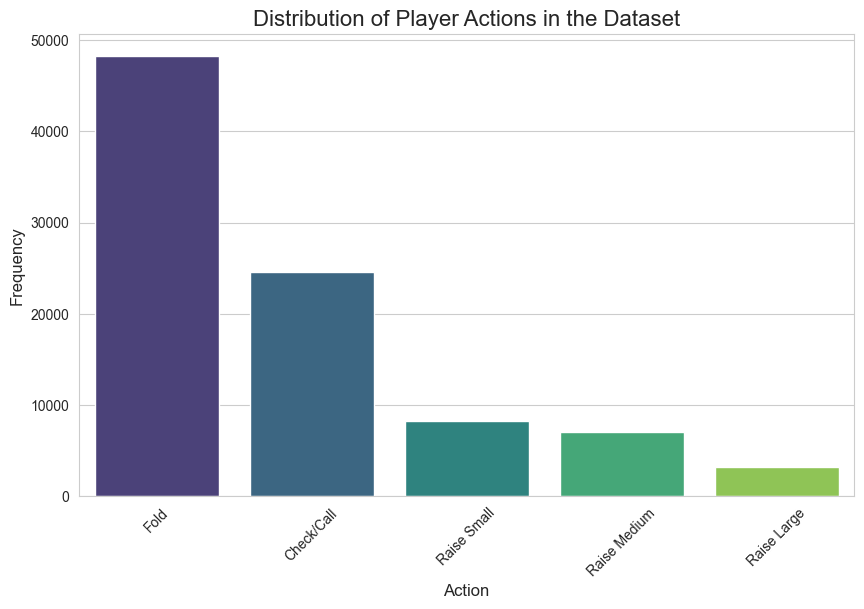

In [11]:
action_label_map = {
    0: 'Fold',
    1: 'Check/Call',
    2: 'Raise Small',
    3: 'Raise Medium',
    4: 'Raise Large'
}

# Map the numerical action to a readable string
df['action_name'] = df['action_taken'].map(action_label_map)

# Calculate the frequency of each action
action_counts = df['action_name'].value_counts()
action_percentages = df['action_name'].value_counts(normalize=True) * 100

print("Action Distribution:")
print(pd.concat([action_counts, action_percentages.round(2)], axis=1, keys=['Count', 'Percentage (%)']))

# Plot the action distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=action_counts.index, y=action_counts.values, palette='viridis')
plt.title('Distribution of Player Actions in the Dataset', fontsize=16)
plt.xlabel('Action', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [14]:
display(df)

,hand_id,player_id,player_name,position,hole_card_1,hole_card_2,community_card_1,community_card_2,community_card_3,community_card_4,community_card_5,pot_size_before_action,amount_to_call,action_history_in_round,p1_stack,p2_stack,p3_stack,p4_stack,p5_stack,p6_stack,action_taken,action_str,action_name
0,134,2,Joe,2,6c,2s,NaN,NaN,NaN,NaN,NaN,150,100,NaN,9950,9900,10000,10000,10000,10000,0,p3 f,Fold
1,134,3,Pluribus,3,5h,Kd,NaN,NaN,NaN,NaN,NaN,150,100,p3_f,9950,9900,10000,10000,10000,10000,0,p4 f,Fold
2,134,4,MrBlue,4,7h,Jh,NaN,NaN,NaN,NaN,NaN,150,100,p3_f p4_f,9950,9900,10000,10000,10000,10000,3,p5 cbr 225,Raise Medium
3,134,5,MrPink,5,6h,4s,NaN,NaN,NaN,NaN,NaN,375,225,p3_f p4_f p5_cbr,9950,9900,10000,10000,9775,10000,0,p6 f,Fold
4,134,0,Bill,0,8d,9c,NaN,NaN,NaN,NaN,NaN,375,175,p3_f p4_f p5_cbr p6_f,9950,9900,10000,10000,9775,10000,0,p1 f,Fold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94753,139,3,MrBlue,3,2h,Kc,NaN,NaN,NaN,NaN,NaN,150,100,p3_f,9950,9900,10000,10000,10000,10000,0,p4 f,Fold
94754,139,4,Pluribus,4,Jd,7c,NaN,NaN,NaN,NaN,NaN,150,100,p3_f p4_f,9950,9900,10000,10000,10000,10000,0,p5 f,Fold
94755,139,5,Budd,5,7d,As,NaN,NaN,NaN,NaN,NaN,150,100,p3_f p4_f p5_f,9950,9900,10000,10000,10000,10000,3,p6 cbr 250,Raise Medium
94756,139,0,MrWhite,0,4h,3d,NaN,NaN,NaN,NaN,NaN,400,200,p3_f p4_f p5_f p6_cbr,9950,9900,10000,10000,10000,9750,0,p1 f,Fold


In [21]:
sample_hand_id = 134
print(f"--- Tracing all decisions for Hand ID: {int(sample_hand_id)} ---")

# Filter the DataFrame for this hand and select relevant columns
hand_df = df[df['hand_id'] == sample_hand_id][[
    'player_name',
    'position',
    'hole_card_1',
    'hole_card_2',
    'community_card_1',
    'community_card_2',
    'community_card_3',
    'community_card_4',
    'community_card_5',
    'pot_size_before_action',
    'amount_to_call',
    'action_str',
    'action_name'
]].copy()

# A little formatting to make it easier to read
# THIS IS THE CORRECTED PART
def format_community_cards(row):
    cards = [
        row['community_card_1'], row['community_card_2'], row['community_card_3'],
        row['community_card_4'], row['community_card_5']
    ]
    # Filter out NaN/None values and convert others to string before joining
    return '-'.join([str(card) for card in cards if pd.notna(card)])

hand_df['community_cards'] = hand_df.apply(format_community_cards, axis=1)

# Now drop the original community card columns
hand_df = hand_df.drop(columns=[
    'community_card_1', 'community_card_2', 'community_card_3',
    'community_card_4', 'community_card_5'
])


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(hand_df)

--- Tracing all decisions for Hand ID: 134 ---


,player_name,position,hole_card_1,hole_card_2,pot_size_before_action,amount_to_call,action_str,action_name,community_cards
0,Joe,2,6c,2s,150,100,p3 f,Fold,
1,Pluribus,3,5h,Kd,150,100,p4 f,Fold,
2,MrBlue,4,7h,Jh,150,100,p5 cbr 225,Raise Medium,
3,MrPink,5,6h,4s,375,225,p6 f,Fold,
4,Bill,0,8d,9c,375,175,p1 f,Fold,
5,Eddie,1,9h,3c,375,125,p2 f,Fold,
3523,Eddie,2,6s,9d,150,100,p3 f,Fold,
3524,Pluribus,3,Qh,Tc,150,100,p4 f,Fold,
3525,Bill,4,2h,4d,150,100,p5 f,Fold,
3526,MrOrange,5,8s,7h,150,100,p6 f,Fold,


In [22]:
try:
    df = pd.read_csv('./data/pluribus_dataset.csv')
    print("File loaded successfully!")
except FileNotFoundError:
    print("Error: state_action_pairs.csv not found.")
    print("Please make sure you have run 'scripts/01_parse_hand_histories.py' first.")

# Display basic information about the DataFrame
if 'df' in locals():
    print(f"Shape of the DataFrame: {df.shape}")
    print("\nFirst 5 rows:")
    display(df.head())
    print("\nData types and missing values:")
    df.info()

File loaded successfully!
Shape of the DataFrame: (15169, 5)

First 5 rows:


,hand_id,state_vector,action_label,action_name,raise_amount_norm
0,134,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0,fold,0.0
1,120,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,check_call,0.0
2,120,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,bet_raise,9.0
3,108,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,fold,0.0
4,35,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0,fold,0.0



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15169 entries, 0 to 15168
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hand_id            15169 non-null  int64  
 1   state_vector       15169 non-null  object 
 2   action_label       15169 non-null  int64  
 3   action_name        15169 non-null  object 
 4   raise_amount_norm  15169 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 592.7+ KB
